In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('House_Rent_Dataset.csv')

In [3]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
data.shape

(4746, 12)

In [5]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [7]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [8]:
data.describe(include='O')

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4746,4746,4746,4746,4746,4746,4746,4746
unique,81,480,3,2235,6,3,3,3
top,2022-07-06,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,Contact Owner
freq,311,379,2446,37,972,2251,3444,3216


In [9]:
data.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [10]:
num_col=data[['BHK','Rent','Size','Bathroom']]
num_col.columns

Index(['BHK', 'Rent', 'Size', 'Bathroom'], dtype='object')

In [11]:
cat_col=data[['Floor','Point of Contact','Area Type','Area Locality','City','Furnishing Status','Tenant Preferred']]

In [12]:
cat_col.columns

Index(['Floor', 'Point of Contact', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred'],
      dtype='object')

In [13]:
for column in cat_col.drop(['Floor','Area Locality'],axis=1):
  print(column,data[column].unique())
  print(column,data[column].value_counts())

Point of Contact ['Contact Owner' 'Contact Agent' 'Contact Builder']
Point of Contact Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64
Area Type ['Super Area' 'Carpet Area' 'Built Area']
Area Type Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64
City ['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad']
City Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64
Furnishing Status ['Unfurnished' 'Semi-Furnished' 'Furnished']
Furnishing Status Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64
Tenant Preferred ['Bachelors/Family' 'Bachelors' 'Family']
Tenant Preferred Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64


In [14]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [15]:
data.duplicated().sum()

0

**Conversion of categorical into numerical**

In [16]:
data.drop(['Posted On','Floor','Area Locality'],axis=1,inplace=True)

In [17]:
data.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact'],
      dtype='object')

In [18]:
# Area type
data['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [19]:
data['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

In [20]:
data['Area Type']=data['Area Type'].map({'Super Area':2,'Carpet Area':1,'Built Area':0})

In [21]:
# city
data['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [22]:
data['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [23]:
data['City']=data['City'].map({'Mumbai':5,'Chennai':4,'Bangalore':3,'Hyderabad':2,'Delhi':1,'Kolkata':0})

In [24]:
# Furnishing Status
data['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [25]:
data['Furnishing Status'].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

In [26]:
data1=data.copy()

In [27]:
df1=pd.get_dummies(data['Furnishing Status'],prefix='Furnishing Status',drop_first=True)

In [28]:
data1=pd.concat([data1,df1],axis=1).drop(['Furnishing Status'],axis=1)

In [29]:
#Tenant Preferred
data['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [30]:
data['Tenant Preferred'].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

In [31]:
df1=pd.get_dummies(data['Tenant Preferred'],prefix='Tenant Preferred',drop_first=True)
data1=pd.concat([data1,df1],axis=1).drop(['Tenant Preferred'],axis=1)

In [32]:
# Point of contact
data['Point of Contact'].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [33]:
data['Point of Contact'].value_counts()

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

In [34]:
data1['Point of Contact']=data1['Point of Contact'].map({'Contact Owner':2,'Contact Agent':1,'Contact Builder':0})

In [35]:
data1

,BHK,Rent,Size,Area Type,City,Bathroom,Point of Contact,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,10000,1100,2,0,2,2,0,1,1,0
1,2,20000,800,2,0,1,2,1,0,1,0
2,2,17000,1000,2,0,1,2,1,0,1,0
3,2,10000,800,2,0,1,2,0,1,1,0
4,2,7500,850,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,1,2,2,2,1,0,1,0
4742,3,29000,2000,2,2,3,2,1,0,1,0
4743,3,35000,1750,1,2,3,1,1,0,1,0
4744,3,45000,1500,1,2,2,1,1,0,0,1


**Check for outliers**

**Size column is the only continuous column, so checking for outliers**

<Axes: xlabel='Size'>

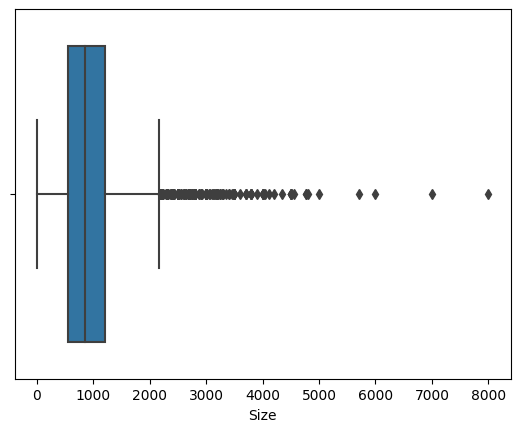

In [36]:
sns.boxplot(data=data,x=data['Size'])

<Axes: xlabel='Size', ylabel='Count'>

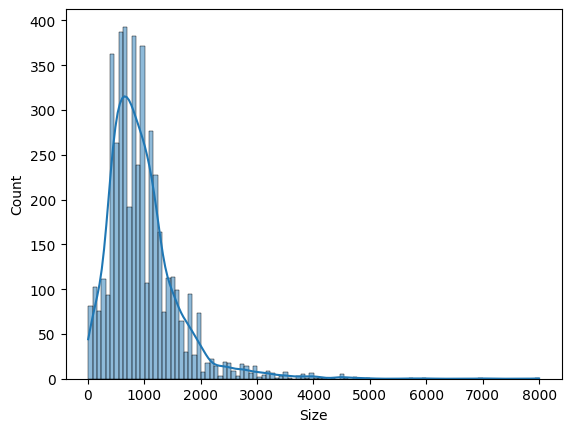

In [37]:
sns.histplot(data=data,x=data['Size'],kde=True)

In [38]:
 #IQR=Q3-Q1
# find Q1
Q1=data['Size'].quantile(0.25)
Q1

550.0

In [39]:
Q3=data['Size'].quantile(0.75)
Q3

1200.0

In [40]:
IQR=Q3-Q1
IQR

650.0

In [41]:
# Lower limit=Q1-1.5*IQR
Lowerlimit=Q1-1.5*IQR
Lowerlimit

-425.0

In [42]:
# Upper limit=Q3+1.5*IQR
Upperlimit=Q3+1.5*IQR
Upperlimit

2175.0

In [43]:
data.loc[(data['Size']>Upperlimit) | (data['Size']<Lowerlimit)]

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
181,1,50000,2200,2,0,Furnished,Bachelors/Family,3,Contact Owner
275,4,30000,4000,2,0,Furnished,Bachelors/Family,3,Contact Agent
381,3,40000,3500,2,0,Semi-Furnished,Bachelors/Family,2,Contact Owner
516,3,65000,2210,1,0,Unfurnished,Bachelors/Family,3,Contact Owner
543,5,400000,2308,1,5,Furnished,Family,5,Contact Agent
...,...,...,...,...,...,...,...,...,...
4696,6,30000,4200,2,2,Semi-Furnished,Bachelors/Family,5,Contact Owner
4698,3,53000,2300,1,2,Furnished,Bachelors,3,Contact Agent
4712,3,60000,2405,2,2,Semi-Furnished,Bachelors,3,Contact Agent
4713,3,35000,2500,2,2,Unfurnished,Bachelors/Family,2,Contact Owner


In [44]:
len(data.loc[(data['Size']>Upperlimit) | (data['Size']<Lowerlimit)])/len(data)

0.04277286135693215

**Since outlier percentage of size is less than 4%, we need to handle it**

In [45]:
data1['Size'].median()

850.0

In [46]:
data1.loc[(data1['Size']>Upperlimit) | (data1['Size']<Lowerlimit),'Size']=850

<Axes: xlabel='Size'>

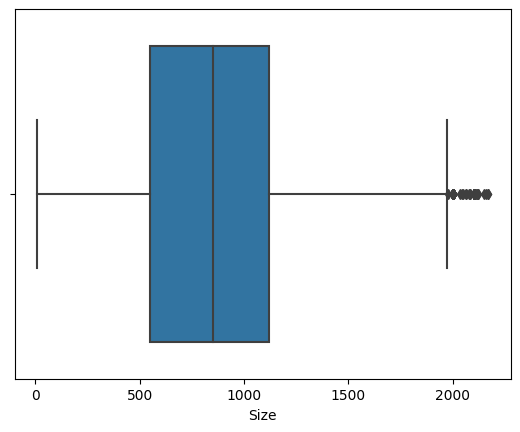

In [47]:
sns.boxplot(data=data1,x=data1['Size'])

<Axes: xlabel='Size', ylabel='Count'>

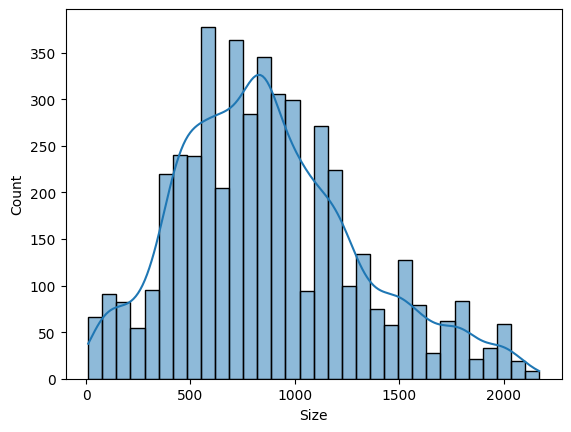

In [48]:
sns.histplot(data=data1,x=data1['Size'],kde=True)

**Feature Engineering**

In [49]:
# checking correlation
corr_data=data1[['BHK', 'Rent', 'Size', 'Bathroom']]

<Axes: >

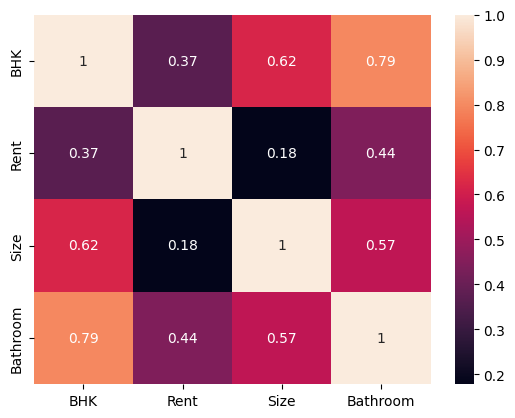

In [50]:
sns.heatmap(corr_data.corr(),annot=True)

**Size having less correlation with rent, since dataset is small not dropping Size**

**Split data into x and y**

In [51]:
x=data1.drop('Rent',axis=1)
y=data1.Rent

In [52]:
# split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [53]:
x_train.shape

(3322, 10)

In [54]:
y_train.shape

(3322,)

**Model Building**

In [55]:
# import Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [56]:
# Prediction
y_pred=model.predict(x_test)

In [57]:
# slope of coeff
model.coef_

array([ 1.61008200e+04, -2.17276852e+01, -5.47472362e+03,  5.79037278e+03,
        2.50851181e+04, -2.57035543e+04, -1.24215591e+04, -1.62326879e+04,
       -1.89418687e+03, -1.01247387e+04])

In [58]:
#model.intercept
model.intercept_

20729.688722464918

**Evaluate the model**

In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [60]:
mean_squared_error(y_test,y_pred)

2085427582.5478358

In [61]:
mean_absolute_error(y_test,y_pred)

24274.632731478756

In [62]:
r2_score(y_test,y_pred)

0.4455517001740381

**44% best model to make prediction**

**KNN Regressor**

In [63]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=60)
KNN.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=60)

In [64]:
y_pred=KNN.predict(x_test)

In [65]:
# evaluation
mean_squared_error(y_test,y_pred)

2245607428.908192

In [66]:
r2_score(y_test,y_pred)

0.402965017124426

**To find the optimal value of n**

In [67]:
error_rate=[]
for i in range(60,99):
  KNN=KNeighborsRegressor(n_neighbors=i)
  KNN.fit(x_train,y_train)
  pred_i=KNN.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))


Text(0, 0.5, 'Error Rate')

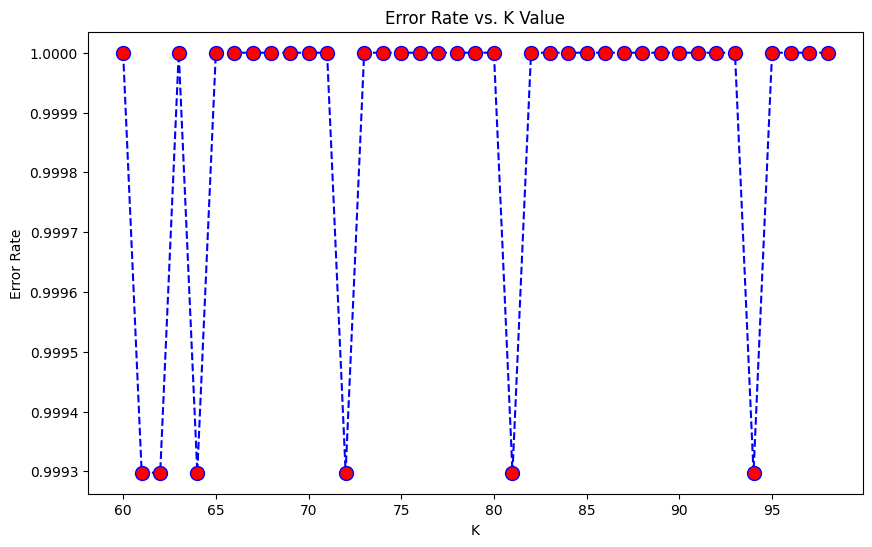

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(60,99),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [69]:
table=pd.DataFrame(error_rate,index=(range(60,99)))

In [70]:
table.sort_values(0,ascending=True)

,0
81,0.999298
61,0.999298
62,0.999298
64,0.999298
94,0.999298
72,0.999298
83,1.000000
84,1.000000
85,1.000000
86,1.000000


**From above table n=81 having minimum error_rate**

In [71]:
KNN=KNeighborsRegressor(n_neighbors=81)
KNN.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=81)

In [72]:
y_pred=KNN.predict(x_test)

In [73]:
# Evaluation
mean_squared_error(y_test,y_pred)

2299819455.3144536

In [74]:
r2_score(y_test,y_pred)

0.388551778265108

**Support Vector Machine**

In [75]:
from sklearn.svm import SVR
svregressor=SVR()
svregressor.fit(x_train,y_train)

SVR()

In [76]:
#predictions
y_pred=svregressor.predict(x_test)

In [77]:
# evaluation
mean_squared_error(y_test,y_pred)

4089454611.2167363

In [78]:
r2_score(y_test,y_pred)

-0.0872548034654903

In [80]:
# Cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svregressor,x,y,cv=5,scoring='r2')
print(scores)
print(scores.mean())
print(scores.std())

[-0.13947379 -0.11158135 -0.06346824 -0.0257098  -0.01780033]
-0.07160670193143778
0.04748010184944233


**If std is less than 0.05,then the model is good**
* 0.047<0.05, the model is good

**Hyperparameter tuning**

In [82]:
# gridsearch cv
from sklearn.model_selection import GridSearchCV
param_grid={'C':[5,10,50,60,70],'gamma':[0.1,0.01,0.001,0.001]}
svregressor=SVR()
grid=GridSearchCV(svregressor,param_grid,verbose=2,scoring='r2',cv=5)
grid.fit(x,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .....................................C=5, gamma=0.1; total time=   2.0s
[CV] END .....................................C=5, gamma=0.1; total time=   1.2s
[CV] END .....................................C=5, gamma=0.1; total time=   1.2s
[CV] END .....................................C=5, gamma=0.1; total time=   1.2s
[CV] END .....................................C=5, gamma=0.1; total time=   1.2s
[CV] END ....................................C=5, gamma=0.01; total time=   2.5s
[CV] END ....................................C=5, gamma=0.01; total time=   1.7s
[CV] END ....................................C=5, gamma=0.01; total time=   1.5s
[CV] END ....................................C=5, gamma=0.01; total time=   1.5s
[CV] END ....................................C=5, gamma=0.01; total time=   1.5s
[CV] END ...................................C=5, gamma=0.001; total time=   1.5s
[CV] END ...................................C=5

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [5, 10, 50, 60, 70],
                         'gamma': [0.1, 0.01, 0.001, 0.001]},
             scoring='r2', verbose=2)

In [83]:
print(grid.best_params_)

{'C': 70, 'gamma': 0.001}


In [84]:
svregressor=SVR(C=70,gamma=0.001)
svregressor.fit(x_train,y_train)

SVR(C=70, gamma=0.001)

In [86]:
y_pred=svregressor.predict(x_test)

In [87]:
# Evaluation
mean_squared_error(y_test,y_pred)

3948422900.958565

In [88]:
r2_score(y_test,y_pred)

-0.04975899558965047

**Decision Tree**

In [89]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
y_pred=DTR.predict(x_test)

In [90]:
# Evaluation
mean_squared_error(y_test,y_pred)

2788874997.8170643

In [91]:
r2_score(y_test,y_pred)

0.258527596974787

**Hyperparameter tuning**

In [96]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("squared_error", "absolute_error"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 10))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 11)),
}

In [97]:
DTR = DecisionTreeRegressor(random_state=3)
tree_cv = GridSearchCV(DTR, params, scoring="r2", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
Best paramters: {'criterion': 'absolute_error', 'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 2, 'splitter': 'best'})


In [98]:
tree_cv.best_score_

0.45732801002611234

In [102]:
DTR=DecisionTreeRegressor(criterion='absolute_error',max_depth=7,min_samples_leaf= 9,min_samples_split=2,splitter='best')
DTR.fit(x_train,y_train)#training the model
y_pred=DTR.predict(x_test)#prediction

In [103]:
mean_squared_error(y_test,y_pred)

1189669988.8702598

In [104]:
r2_score(y_test,y_pred)

0.6837049110680609

**Random Forest**

In [105]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
y_pred=RFR.predict(x_test)

In [106]:
mean_squared_error(y_test,y_pred)

2015297431.8494668

In [107]:
r2_score(y_test,y_pred)

0.4641970576760923

**Hyperparameter tuning**

In [108]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [109]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}
RFR = RandomForestRegressor(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=RFR, scoring='r2',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False})


In [110]:
RFR = RandomForestRegressor(n_estimators= 1600, min_samples_split=5, min_samples_leaf= 2, max_features='sqrt', max_depth=10, bootstrap=False)#passing best parameter to randomforest
RFR.fit(x_train,y_train)
y_pred=RFR.predict(x_test)


In [111]:
# Evaluation
mean_squared_error(y_test,y_pred)

1319560692.8843803

In [112]:
r2_score(y_test,y_pred)

0.6491711393818534

**Bagging**

In [162]:
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor(base_estimator=model,n_estimators=100)
BR.fit(x_train,y_train)
y_pred=BR.predict(x_test)

In [163]:
mean_squared_error(y_test,y_pred)

2087014325.7856236

In [164]:
r2_score(y_test,y_pred)

0.4451298360451591

**Gradient Boosting**

In [147]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor(n_estimators=30)
GB.fit(x_train,y_train)
y_pred=GB.predict(x_test)

In [148]:
mean_squared_error(y_test,y_pred)

1157826711.5755498

In [149]:
r2_score(y_test,y_pred)

0.6921710170621939

**XGBoosting**

In [150]:
from xgboost import XGBRegressor
XGBR=XGBRegressor()
XGBR.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [151]:
y_pred=XGBR.predict(x_test)

In [152]:
mean_squared_error(y_test,y_pred)

2168427760.5106435

In [153]:
r2_score(y_test,y_pred)

0.4234846152549311

**Hyperparameter**

In [154]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGBR=XGBRegressor(random_state=42,verbosity=0)
rcv= RandomizedSearchCV(estimator=XGBR, scoring='r2',param_distributions=param_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

In [155]:
rcv.fit(x_train,y_train)# training data on randomsearch cv
cv_best_params=rcv.best_params_# it will give you best parameters
print(f'Best parameters: {cv_best_params})')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'reg_lambda': 0.2, 'reg_alpha': 0.8, 'n_estimators': 65, 'max_depth': 5, 'learning_rate': 0.06, 'gamma': 0.8})


In [159]:
XGBR2=XGBRegressor(reg_lambda= 0.2, reg_alpha= 0.8, n_estimators=65, max_depth=5,
                   learning_rate=0.06, gamma=0.8)
XGBR2.fit(x_train, y_train)#training
y_predict=XGBR2.predict(x_test)#testing

In [160]:
# Evaluation
mean_squared_error(y_test,y_predict)

1492191018.080651

In [161]:
r2_score(y_test,y_predict)

0.6032742733844557

**Recommendation**
* From the above Machine learning algorithms the r2_score predicted as follows
* Linear Regression- 0.4455517001740381
* KNN Regressor - 0.388551778265108
* Suport Vector Regressor- -0.04975899558965047
* Decision Tree Regressor - 0.6837049110680609
* Random Forest Regressor - 0.6491711393818534
* Bagging Regressor - 0.4451298360451591
* Gradient Boosting Regressor - 0.6921710170621939
* XG Boosting Regressor - 0.6032742733844557

**From the above predictions i recommends Gradient Boosting Regressor model for House Rent Prediction.**

